In [1]:
import pandas as pd
import torch
from kan import *
model = KAN(width=[3,5,1], grid=5, k=3, seed=0)

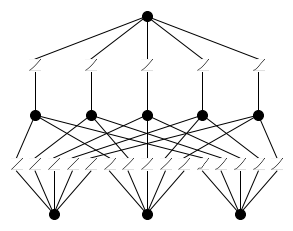

In [2]:
data1 = pd.read_csv('../tb_log/Transformer_CrossValid_cross{}/train_eval.csv'.format(0))
data2 = pd.read_csv('../tb_log/CNN_baseline_new_cross{}/train_eval.csv'.format(0))
data3 = pd.read_csv('../tb_log/SupportVector_CrossValid_nonImg_cross{}/train_eval.csv'.format(0))
label = torch.tensor(data2['COG'])
data1=data1.iloc[:,3]
data2=data2.iloc[:,1]
data3=data3.iloc[:,2]
data = pd.concat([data1,data2],axis=1)
data = pd.concat([data,data3],axis=1)
data = torch.tensor(data.to_numpy(), dtype=torch.float32)
dataset={}
dataset['train_input'] = data
dataset['train_label']=label


data1 = pd.read_csv('../tb_log/Transformer_CrossValid_cross{}/test_eval.csv'.format(0))
data2 = pd.read_csv('../tb_log/CNN_baseline_new_cross{}/test_eval.csv'.format(0))
data3 = pd.read_csv('../tb_log/SupportVector_CrossValid_nonImg_cross{}/test_eval.csv'.format(0))
label = torch.tensor(data2['COG'])
data1=data1.iloc[:,3]
data2=data2.iloc[:,1]
data3=data3.iloc[:,2]
data = pd.concat([data1,data2],axis=1)
data = pd.concat([data,data3],axis=1)
data = torch.tensor(data.to_numpy(), dtype=torch.float32)
# dataset={}
dataset['test_input'] = data
dataset['test_label']=label



data1 = pd.read_csv('../tb_log/Transformer_CrossValid_cross{}/valid_eval.csv'.format(0))
data2 = pd.read_csv('../tb_log/CNN_baseline_new_cross{}/valid_eval.csv'.format(0))
data3 = pd.read_csv('../tb_log/SupportVector_CrossValid_nonImg_cross{}/valid_eval.csv'.format(0))
label = torch.tensor(data2['COG'])
data1=data1.iloc[:,3]
data2=data2.iloc[:,1]
data3=data3.iloc[:,2]
data = pd.concat([data1,data2],axis=1)
data = pd.concat([data,data3],axis=1)
data = torch.tensor(data.to_numpy(), dtype=torch.float32)
# dataset={}
dataset['valid_input'] = data
dataset['valid_label']=label

model(dataset['train_input'])
model.plot(beta=1000)

In [7]:
model.train(dataset, opt="LBFGS", steps=100, lamb=5e-5, lamb_entropy=0.0001, save_fig=True, beta=10, 
            in_vars=[r'$x_1$', r'$x_2$', r'$x_3$'],
            # out_vars=[r'${\rm exp}({\rm sin}(x_1^2+x_2^2)+{\rm sin}(x_3^2+x_4^2))$'],
            img_folder='video_img');

train loss: 7.15e-01 | test loss: 7.18e-01 | reg: 1.66e-01 : 100%|█| 100/100 [07:09<00:00,  4.29s/it


In [8]:
import os
import numpy as np
import moviepy.video.io.ImageSequenceClip # moviepy == 1.0.3

video_name='video'
fps=5

fps = fps
files = os.listdir('video_img')
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith('.jpg'):
        train_index.append(int(file[:-4]))

train_index = np.sort(train_index)

image_files = ['video_img'+'/'+str(train_index[index])+'.jpg' for index in train_index]

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(video_name+'.mp4')

Moviepy - Building video video.mp4.
Moviepy - Writing video video.mp4



Moviepy - Done !
Moviepy - video ready video.mp4


In [61]:
model.train(dataset, opt="LBFGS", steps=1, lamb=0.0001, lamb_entropy=1.);

train loss: 7.15e-01 | test loss: 7.18e-01 | reg: 7.79e+00 : 100%|████| 1/1 [00:00<00:00,  3.45it/s]


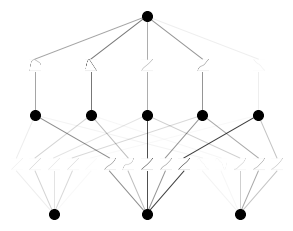

In [62]:
model.plot()

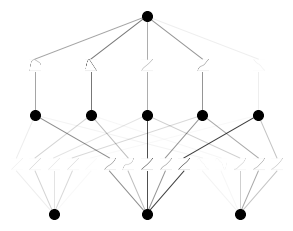

In [63]:
model.train(dataset, opt="LBFGS", steps=50, lamb=5e-5, lamb_entropy=2., save_fig=True, beta=10, 
            in_vars=[r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$'],
            out_vars=[r'${\rm exp}({\rm sin}(x_1^2+x_2^2)+{\rm sin}(x_3^2+x_4^2))$'],
            img_folder=image_folder);

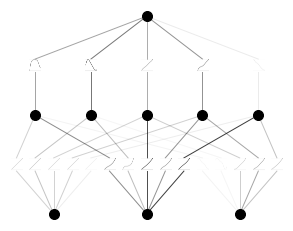

In [64]:
model = model.prune()
model(dataset['train_input'])
model.plot()